In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Applied Math 10: Computing for Science and Engineering

## Lab 5 : Elementary - Finding Roots

**Spring 2020**

---

## Learning Goals of Lab 

An important feature of functions is the values of the argument where the function becomes zero, called a `root'. 

By the end of this lab, you will be able to perform the following operations:
- Bracketing roots
- Estimating roots using Bisection 
- Use a more accurate method to find the roots, Newton-Raphson method

In [121]:
# Here we define the function that we will be using to find its roots
def fofx(x):
    y = (x - 1.0) * (x - 2.0) * (x - 3.0) * (x - 4.0)
# another choice
#    y = np.sin(x) - x/2.0
    return y


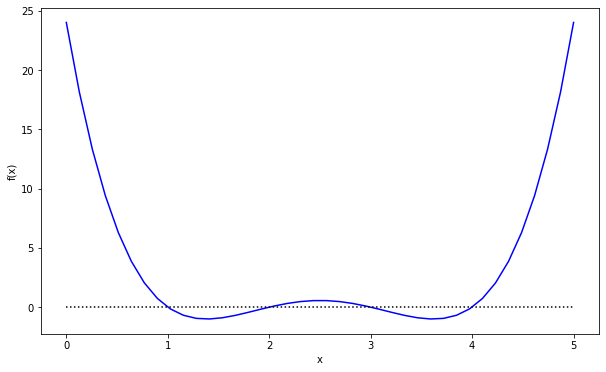

In [122]:
# Here we plot the function, and a horizontal line (dashed) to help visualize 
#  where the roots occur
xmin = 0
xmax = 5
npoints = 40
x = np.linspace(xmin, xmax, npoints)
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(x, fofx(x), color='b', marker='', linestyle='-')
ax.plot([xmin, xmax], [0, 0], color='k', marker='', linestyle=':')
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
plt.show(fig)

### 1. Bracketing

A root is bracketed in an interval $(a, b)$ if the function changes sign over that interval, i.e., $f(a)$ and $f(b)$ have opposite signs.

**Exercise 1** 

Create a function called `bracket()` to bracket the roots of a given mathematical function. The inputs arguments of `bracket()` should be 

1. independent variable defined in the range in which we want to find roots
2. the values of the function in this interval

The `bracket()` function should return a list of all the brackets found in the provided range and print the number of zero-crossings (i.e. roots) found. 

Once you have written the `bracket()` function test it on the above function.

In [123]:
# Template for your code

def bracket(x, my_fun):
    ''' This code does the following: 
         1) define arrays for the bracket intervals, called "bracket_a" and "bracket_b"
         2) iterate through all values of my_fun, to find where the function changes sign
         3) save the values of x between which the value of my_fun changes sign to the 
         arrays bracket_a, bracket_b
         4) keep track of the number of brackets (and roots) you found ??? HOW
         5) return the number of roots, "num_root", and the brackets
         6) print this information (num_roots, bracket_a, bracket_b) in a neat way
    '''
    # Init function
    lenx = len(x)
    
    # number of roots
    num_root = 0
    
    # Init bracket arrays
    bracket_a = [] # we use list because we don't know how many roots there are
    bracket_b = []
    
    # Iterate
    for i in range(lenx-1):
        if my_fun(x[i]) * my_fun(x[i+1]) < 0:
            bracket_a.append(x[i])
            bracket_b.append(x[i+1])
            num_root += 1
    # Debug        
    print(f"Number of roots: {num_root}")
    #for n in range(num_root):
    #    print(n+1, bracket_a[n], bracket_b[n])
    
    return num_root, bracket_a, bracket_b

Number of roots: 4


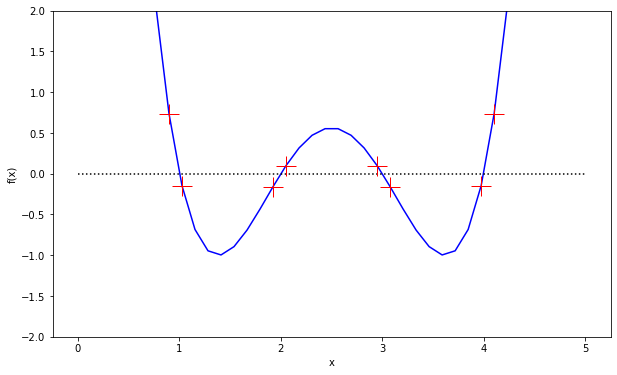

(4,
 [0.8974358974358974,
  1.923076923076923,
  2.9487179487179485,
  3.974358974358974],
 [1.0256410256410255,
  2.051282051282051,
  3.0769230769230766,
  4.102564102564102])

In [115]:
# Now use the bracket function to find the brackets of the roots for the
#  function defined earlier in function "fofx"
# We make this into a function so we can use it again later

def bracket_plot(fofx,xmin,xmax,Nx):
    x = np.linspace(xmin, xmax, Nx)

    num_root, bracket_a, bracket_b = bracket(x, fofx)

    fig1, ax1 = plt.subplots(figsize=(10,6))
    ax1.plot(x, fofx(x), color='b', marker='', linestyle='-')
    ax1.plot([xmin, xmax], [0, 0], color='k', marker='', linestyle=':')
    
    # Plot roots
    for n in range(num_root):
        ax1.plot(bracket_a[n],fofx(bracket_a[n]), 'r+', markersize=20)
        ax1.plot(bracket_b[n],fofx(bracket_b[n]), 'r+', markersize=20)
        
    ax1.set_ylim(-2, 2)
    ax1.set_xlabel('x')
    ax1.set_ylabel('f(x)')
    plt.show(fig1)
    
    return num_root, bracket_a, bracket_b

# Call bracket_plot()
bracket_plot(fofx, xmin, xmax, npoints)


### 2. Bisection

In a given bracket $[a,b]$, we'd like to know the root with greater precision.

The first check is to see if at the midpoint $c = (a+b)/2$ we already have a good estimate 
of the root, that is, $f(c) \approx 0$, with some precision that we call "epsilon"
$(\epsilon)$, in other words, 
$$f(c) = 0 \pm \epsilon.$$
If this is the case we are done. If not, we bisect the interval to lower-half and upper-half, and we check the same again, until we get the root within the desired precision. To do this, we figure out for with which end-point of the interval $[a,b]$, te function $f(a)$, $f(b)$ has the same sign as at the midpoint $f(c)$. We then choose as our new, half interval, the mid-point and the other end point, because the function changes sign between the mid-point and this other end-point.

**Exercise 2** 

Complete the code below to create the `bisection()` function. 

The input arguments for this function should be:

1. a function the describes the mathematical expression whose roots we want to obtain, 
2. the interval, $a$, $b$, in which the root exists, and 
3. the precision tolerance $\epsilon$ value at which the iteration loop should stop
4. the maximum number of iterations we are willing to accept to get to the desired precision tolerance

The output arguments for this function should be:

1. the closest value to the root obtained (should be a value smaller than the precision tolerance $\epsilon$)
2. the number of iterations it took to get this value
3. the value of the argument $x$ where the root occurs

Once you have written the `bisection` function use it to find the roots in all the brackets identified for the function defined above.

In [124]:
def bisection(my_fun, a, b, prec_eps,niter_max):
    '''
    Input
    1. a function the describes the mathematical expression whose roots we want to obtain, 
    2. the interval, a, b, in which the root exists, and 
    3. the precision tolerance epsilon value at which the iteration loop should stop
    4. the maximum number of iterations we are willing to accept to get to the desired precision tolerance
    
    Output
    1. the closest value to the root obtained (should be a value smaller than the precision tolerance $\epsilon$)
    2. the number of iterations it took to get this value
    3. the value of the argument $x$ where the root occurs
        
        Make sure that your code has "if" and "break" statements 
        that allow it to stop if it exceeds the maximum number of 
        iterations allowed
        
    Pseudocode:
    The first check is to see if at the midpoint c = (a+b)/2 we already have a good estimate 
    of the root, that is, f(c) = 0, with some precision that we call "epsilon", in other words, f(c) = 0
    
    If this is the case we are done. If not, we bisect the interval to lower-half and upper-half, 
    and we check the same again, until we get the root within the desired precision. 
    To do this, we figure out for with which end-point of the interval [a,b], the function f(a), f(b)
    has the same sign as at the midpoint f(c). We then choose as our new, half interval, the mid-point and 
    the other end point, because the function changes sign between the mid-point and this other end-point.
    '''
    
    # init 
    c = .5* (a + b)
    fa = my_fun(a)
    fb = my_fun(b)
    fc = my_fun(c)
    
    root_check = np.absolute(fc)
    niter = 0
    acur = a
    bcur = b
    ccur = c
    
    # Loop
    while root_check > prec_eps:
        # Bisectional shrinking
        if (fa*fc) < 0.:
            bcur = ccur
            fb = my_fun(bcur)
        elif (fb*fc) < 0.:
            acur = ccur
            fa = my_fun(acur)
        # Update
        ccur = .5 * (acur + bcur)
        fc = my_fun(ccur)
        niter += 1
        root_check = np.absolute(fc)
        if (niter > niter_max):
            print("Warning: max number exceeded")
            break
                
    return root_check, niter, ccur

In [125]:
# Solution
prec_eps = 1.0e-9
niter_max = 100
cfin = np.zeros(num_root)
for n in range(num_root):
    a = bracket_a[n]
    b = bracket_b[n]
    rc, niter, cfin[n] = bisection(fofx, a, b, prec_eps, niter_max)
    print(n, cfin[n], rc, niter)

0 -0.8080808080808084 92.96197705422493 101
1 1.1111111111111112 0.5389422344154856 101


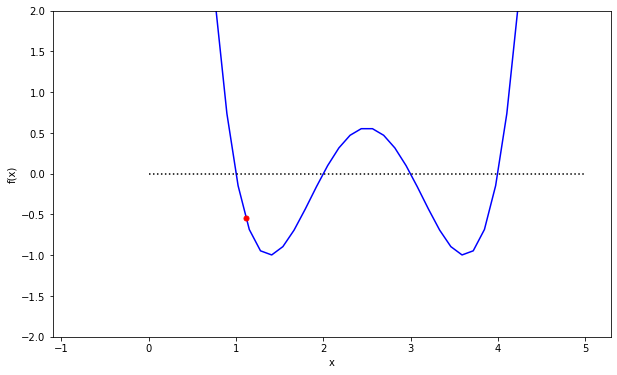

In [126]:
# Plot
fig1, ax1 = plt.subplots(figsize=(10,6))
ax1.plot(x, fofx(x), color='b', marker='', linestyle='-')
ax1.plot([xmin, xmax], [0, 0], color='k', marker='', linestyle=':')
for n in range(num_root):
    ax1.plot(cfin[n], fofx(cfin[n]), 'ro', markersize=5)
ax1.set_ylim(-2, 2)
ax1.set_xlabel('x')
ax1.set_ylabel('f(x)')
plt.show(fig1)

#### 3. Newton-Raphson 

This method was covered in lecture. It uses an initial guess and the Taylor expansion, to approximate the function as linear near the root, and in successive iterations approaches this root. The basic equation is:

\begin{equation}
f'(x_n) = \frac{f(x_{n+1}) - f(x_n)}{x_{n+1} - x_n}
\end{equation}

\begin{equation}
x_{n+1} = x_{n} - \frac{f(x_n)}{f'(x_n)} \; when \: f(x_{n+1}) = 0
\end{equation}

**Exercise 3:**

Write a function called `newton_raphson()` that implements this method. 

The function should take as input:

1. the name of the function whose roots you want to calculate
2. the ininitesimal dx used to calculate the derivatives of the function, using the three-point formula we learned before
3. an initial guess of the vlaue of $x$ where the root occurs 
4. the precision tolerance for the value of the roots (a small number)
5. the number of iterations we are willing to make to converge to the roots with the desired precision tolerance

The function should give as output:

1. the value of $x$ where the root occurs
2. the value of the function at this estimate of the root
3. the number of iterations it took to get to this value


In [127]:
def newton_raphson(my_fun, x1, dx, prec_eps, niter_max):
    '''
    Input:
    1. the name of the function whose roots you want to calculate
    2. the ininitesimal dx used to calculate the derivatives of the function, using the three-point formula we learned before
    3. an initial guess of the vlaue of $x$ where the root occurs 
    4. the precision tolerance for the value of the roots (a small number)
    5. the number of iterations we are willing to make to converge to the roots with the desired precision tolerance

    Output:
    1. the value of $x$ where the root occurs
    2. the value of the function at this estimate of the root
    3. the number of iterations it took to get to this value
    Make sure that your code has "if" and "break" statements 
        that allow it to stop if it exceeds the maximum number of 
        iterations allowed
    Also make sure the derivative is not too small a number, because 
        you are dividing by the derivative 
    '''
    # init
    niter = 0 
    xn = x1
    froot = my_fun(x1)
    root_check = np.absolute(froot)
    # Loop
    while root_check > prec_eps:
        x = xn
        niter += 1
        dfdx = (my_fun(x+dx) - my_fun(x-dx)) / (2. * dx) #Central difference derivative
        if np.absolute(dfdx) < prec_eps:
            print("Derivative is too small - exiting loop")
            break
            
        xn = x - my_fun(x) / dfdx # Algorithm for Newton-Rhapson method x is the previous one, xn is the current one
        
        root_check = np.absolute(my_fun(xn))
        if niter > niter_max:
            print("Warning: max number of iterations exceeded")
            break

    return xn, my_fun(xn), niter

In [128]:
# Solution
prec_eps = 1.0e-7
niter_max = 10
dx = 1.0e-7
for n in range(num_root):
    x1 = bracket_a[n]
    xn, fxn, niter = newton_raphson(fofx, x1, dx, prec_eps, niter_max)
    print(n, xn, fxn, niter)

0 0.9999999999999979 1.2656542480726837e-14 8
1 0.999999999999999 5.995204332975854e-15 4


### Problem 1

We want to apply the methods described above to find the roots of the following function:

\begin{equation}
g(x) = x^6 - x - 1
\end{equation}

First, bracket the roots.
Then, use bisection to find approximations to the roots.
Finally, use Newton-Raphson to find the roots to high precision.

In [73]:
def gofx(x):
    return (x**6) - x - 1

Number of roots: 2


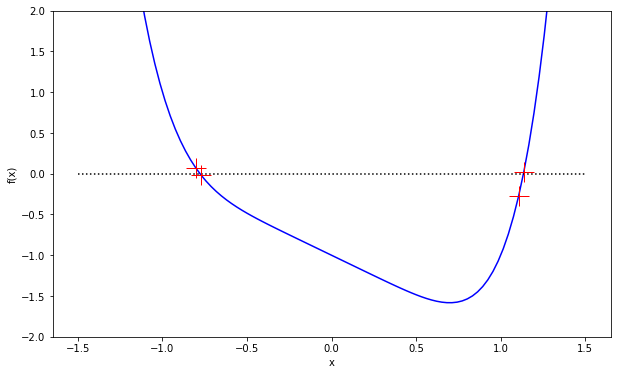

1 -0.803030303030303 -0.7727272727272727
2 1.106060606060606 1.1363636363636362


In [129]:
# Find the bracket
xmin = -1.5
xmax = 1.5
Nx = 100
x = np.linspace(xmin, xmax, npoints)
num_root, bracket_a, bracket_b = bracket_plot(gofx, xmin, xmax, Nx)
for i in range(num_root):
    print(1+i, bracket_a[i], bracket_b[i])

In [130]:
# Bisection approximation
prec_eps = 1.0e-9
niter_max = 50
cfin = np.zeros(num_root)
for n in range(num_root):
    a = bracket_a[n]
    b = bracket_b[n]
    rc, niter, cfin[n] = bisection(gofx, a, b, prec_eps, niter_max)
    print(n+1, cfin[n], rc, niter)

1 -0.7780895987243364 1.2399725690670493e-10 25
2 1.134724138361035 4.164903977255108e-10 23


In [131]:
# Newton-Raphson approximation
dx = 1.0e-7
for n in range(num_root):
    x1 = bracket_a[n]
    xn, gxn, niter = newton_raphson(gofx, x1, dx, prec_eps, niter_max)
    print(n+1, xn, gxn, niter)

1 -0.7780895986982556 5.3287152468328713e-11 3
2 1.1347241384015194 -8.881784197001252e-16 4


### Problem 2

Repeat the same process for the following function:

\begin{equation}
h(x) = \sin{x^6}
\end{equation}

in the interval $x \in [1,2]$, with a precision tolerance of $10^{-13}$.

**Attention:** 
This function has many roots in this interval. To make sure you get all the roots bracketed you should start with some number of points Nx and keep increasing it until the number of roots does not change any more.

Finally, compare the results from the bisection and the Newton-Raphson method.


In [80]:
def hofx(x):
    return np.sin(x**6)

Number of roots: 2


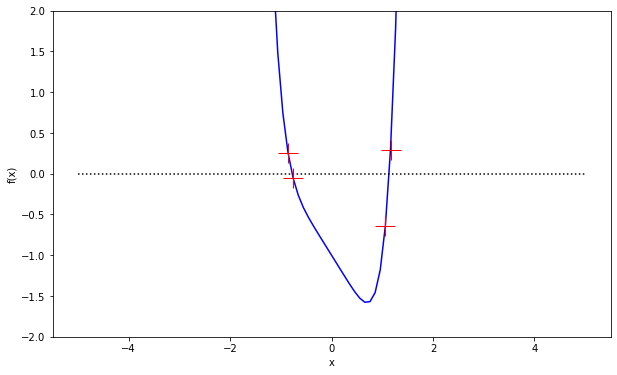

1 -0.858585858585859 -0.7575757575757578
2 1.0606060606060606 1.1616161616161618


In [132]:
# Find the bracket
xmin = -5
xmax = 5
Nx = 100
x = np.linspace(xmin, xmax, npoints)
num_root, bracket_a, bracket_b = bracket_plot(gofx, xmin, xmax, Nx)
for i in range(num_root):
    print(1+i, bracket_a[i], bracket_b[i])

In [133]:
# Bisection approximation
prec_eps = 1.0e-9
niter_max = 50
cfin = np.zeros(num_root)
for n in range(num_root):
    a = bracket_a[n]
    b = bracket_b[n]
    rc, niter, cfin[n] = bisection(gofx, a, b, prec_eps, niter_max)
    print(n+1, cfin[n], rc, niter)

1 -0.7780895984233032 6.921623274536159e-10 26
2 1.1347241383610354 4.164855127442024e-10 24


In [134]:
# Newton-Raphson approximation
dx = 1.0e-7
for n in range(num_root):
    x1 = bracket_a[n]
    xn, gxn, niter = newton_raphson(gofx, x1, dx, prec_eps, niter_max)
    print(n+1, xn, gxn, niter)

1 -0.7780895986786716 1.9095836023552692e-13 4
2 1.1347241384035025 2.040034807748725e-11 4
